# Florida UO2 ThO2 Mixture Assignment: 30Oct

In [1]:
%matplotlib inline
import openmc
import math

In [2]:
while True:
    try:
        print('Please select whether you want to do one run with user inputs (1) or a continuous run (2).')
        userInputTF = int(input())
    except ValueError:
        print("Please type in a valid number (1 or 2)")
        continue
    if userInputTF not in (1,2):
        print("Please type in a valid entry (1 or 2)")
        continue
    else:
        break
if userInputTF == 1: 
    print("Single Run, User Input")
elif userInputTF == 2:
    print("Continuous Run (Currently not supported, please restart)")

Please select whether you want to do one run with user inputs (1) or a continuous run (2).


 1


Single Run, User Input


In [3]:
if userInputTF == 1:
    while True:
        try:
            UO2MassRho = float(input('Desired UO2 Mass Density [g/cc]? (Press Enter key for default for default value of 10.45 g/cc)') or 10.45)
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    while True:
        try:
            UO2Enrichment = float(input('Desired level of UO2 Enrichment (%)? (Press Enter key for default for default value of 5%)') or 5)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    while True:
        try:
            pctLEU = float(input('Desired Uranium/Thorium Fuel Mixture Uranium Fraction (%)? (Press Enter key for default for default value of 40%)') or 40)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    print('UO2 Mass Density: ', UO2MassRho, 'g/cc')
    print('UO2 Enrichment: ', UO2Enrichment*100, '%')
    print('Fuel UO2 Percent: ', pctLEU*100, '%')
    print('Fuel Thorium Percent: ', (1 - pctLEU)*100, '%')


Desired UO2 Mass Density [g/cc]? (Press Enter key for default for default value of 10.45 g/cc) 
Desired level of UO2 Enrichment (%)? (Press Enter key for default for default value of 5%) 19.75
Desired Uranium/Thorium Fuel Mixture Uranium Fraction (%)? (Press Enter key for default for default value of 40%) 90


UO2 Mass Density:  10.45 g/cc
UO2 Enrichment:  19.75 %
Fuel UO2 Percent:  90.0 %
Fuel Thorium Percent:  9.999999999999998 %


## Calculate Weight Percentages

In [4]:
# Constants - via PNNL Mat'l Comp., Rev-2
ThO2OAtomRho = 0.044247 # Oxygen Atom Density in ThO2 [atom/b-cm]
ThO2ThAtomRho = 0.022124 # Thorium Atom Density in ThO2 [atom/b-cm]
ThMolW = 232. # Molecular Weight of Th [g/mol]
OMolW = 16. # Molecular Weight of O [g/mol]
ThO2MolW = ThMolW + 2*OMolW # Molecular Weight of ThO2 [g/mol]
U235MolW = 235. # Molecular Weight of U-235 [g/mol]
U238MolW = 238. # Molecular Weight of U-238 [g/mol]
ThO2MassRho = 9.7 # Mass Density of ThO2 [g/cm^3]
graphMassRho = 2.26 # Mass Density of Graphite [g/cm^3]
he_CoolMassRho = 0.000178 # Mass Density of He @ 293K [g/cm^3]
avo = 0.6022 # Avogadro's Number

# Results of Constants and Input Parameters
# Weight percent of Th in LEU mixture
pctTh = 1 - pctLEU 
# Total Mixture Density
UThMixMassRho = (pctLEU/UO2MassRho + pctTh/ThO2MassRho)**-1 # [g/cm]
# UO2 Atom Densities
UO2UMolW = ((UO2Enrichment/U235MolW) + ((1 - UO2Enrichment)/U238MolW))**-1 # Molecular Weight of U in UO2 [g/mol]
UO2MolW = UO2UMolW + 2*16 # Molecular Weight of UO2 [g/mol]
UO2OAtomRho = (UO2MassRho/UO2MolW)*2*avo # O Atom Density in UO2 [atom/b-cm]
UO2U235AtomRho = (UO2Enrichment*UO2MassRho*(UO2UMolW/UO2MolW)/U235MolW)*avo # U-235 Atom Density in UO2 [atom/b-cm] 
UO2U238AtomRho = ((1 - UO2Enrichment)*UO2MassRho*(UO2UMolW/UO2MolW)/U238MolW)*avo # U-238 Atom Density in UO2 [atom/b-cm]
UO2U235AtomRhoFrac = UO2U235AtomRho/(UO2U235AtomRho+UO2U238AtomRho)
UO2U238AtomRhoFrac = UO2U238AtomRho/(UO2U235AtomRho+UO2U238AtomRho)
# UO2 ThO2 Mixture Atom Densities
UThMixOAtomRho = (pctTh*UThMixMassRho/ThO2MolW)*2*avo + (pctLEU*UThMixMassRho/UO2MolW)*2*avo # Oxygen Atom Density in Fuel Mixture [atom/b-cm]
UThMixThAtomRho = (pctTh*UThMixMassRho/ThO2MolW)*avo # Uranium Atom Density in Fuel Mixture [atom/b-cm] 
UThMixU235AtomRho = (pctLEU*UThMixMassRho/UO2MolW)*avo*UO2U235AtomRhoFrac # Uranium Atom Density in Fuel Mixture [atom/b-cm]
UThMixU238AtomRho = (pctLEU*UThMixMassRho/UO2MolW)*avo*UO2U238AtomRhoFrac # Uranium Atom Density in Fuel Mixture [atom/b-cm]
# UO2 ThO2 Mixture Atom Fractions
# Normalized to 1
UThMixOAtomFrac = UThMixOAtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Oxygen Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixThAtomFrac = UThMixThAtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Fraction in Fuel Mixture [atom/b-cm] 
UThMixU235AtomFrac = UThMixU235AtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixU238AtomFrac = UThMixU238AtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Density in Fuel Mixture [atom/b-cm]
# Normalized to 3
UThMixOAtomFrac3 = UThMixOAtomFrac*3 # Oxygen Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixU235AtomFrac3 = UThMixU235AtomFrac*3 # Uranium Atom Fraction in Fuel Mixture [atom/b-cm] 
UThMixU238AtomFrac3 = UThMixU238AtomFrac*3 # Uranium Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixThAtomFrac3 = UThMixThAtomFrac*3 # Uranium Atom Density in Fuel Mixture [atom/b-cm]

## Calculate Vol %

In [5]:
# Constants
vF_Pebbles_Core = 2./3 # Volume Fraction of Pebbles in Core (Max packing factor)
vF_TRISO_Pebbles = 0.4 # Volume Fraction of TRISO in Pebbles
vF_Fuel_TRISO = 0.15 # Volume Fraction of Fuel in TRISO
fuelVolFrac = vF_Pebbles_Core*vF_TRISO_Pebbles*vF_Fuel_TRISO # Volume Fraction of Fuel
graphVolFrac = vF_Pebbles_Core*(1 - (vF_TRISO_Pebbles*vF_Fuel_TRISO)) # Total Volume Fraction of Graphite
hel_CoolVolFrac = 1 - (fuelVolFrac + graphVolFrac) # Total Volume Fraction of Helium
totalVolFrac = fuelVolFrac + graphVolFrac + hel_CoolVolFrac # Total Volume

# Parameters
# Cube
matCubeL = 1 # [cm]
cubeVol = matCubeL**3 # [cm^3]
# Sphere
matSphereRad = 1 # [cm]
sphereVol = (4/3)*math.pi*matSphereRad**3

# Volume Output
#Cube
fuelCubeVol = fuelVolFrac*cubeVol
graphCubeVol = graphVolFrac*cubeVol
hel_CoolCubeVol = hel_CoolVolFrac*cubeVol
totalCubeVol = fuelCubeVol + graphCubeVol + hel_CoolCubeVol
#Sphere
fuelSphereVol = fuelVolFrac*sphereVol
graphSphereVol = graphVolFrac*sphereVol
hel_CoolSphereVol = hel_CoolVolFrac*sphereVol
totalSphereVol = fuelSphereVol + graphSphereVol + hel_CoolSphereVol
# Mass Output
#Cube
fuelCubeMass = UThMixMassRho*graphCubeVol
graphCubeMass = graphMassRho*graphCubeVol
hel_CoolCubeMass = he_CoolMassRho*graphCubeVol
totalCubeMass = fuelCubeMass + graphCubeMass + hel_CoolCubeMass
#Sphere
fuelSphereMass = UThMixMassRho*graphSphereVol
graphSphereMass = graphMassRho*graphSphereVol
hel_CoolSphereMass = he_CoolMassRho*graphSphereVol
totalSphereMass = fuelSphereMass + graphSphereMass + hel_CoolSphereMass

## Define Materials

In [6]:
fuel = openmc.Material(name='fuel');
#The below ratios were calculated assuming 95%LEU-5%Th Oxide Fuel.
fuel.add_nuclide('Th232', UThMixThAtomFrac, 'ao')
fuel.add_nuclide('U235', UThMixU235AtomFrac, 'ao') #5% U-235 enrichment
fuel.add_nuclide('U238', UThMixU238AtomFrac, 'ao')
fuel.add_element('O', UThMixOAtomFrac, 'ao')
fuel.set_density('g/cm3', UThMixMassRho) # Based on assumption of fuel density within TRISO
fuel.volume = cubeVol
print(fuel)

Material
	ID             =	1
	Name           =	fuel
	Temperature    =	None
	Density        =	10.369820971867009 [g/cm3]
	Volume         =	1 [cm^3]
	S(a,b) Tables  
	Nuclides       
	Th232          =	0.033945880661656755 [ao]
	U235           =	0.05973325641874065 [ao]
	U238           =	0.23965419625293596 [ao]
	O16            =	0.6664140000000001 [ao]
	O17            =	0.0002526666666666667 [ao]



In [7]:
# Establish Graphite Moderator material
graph = openmc.Material(name='graph')
# add nuclides to graph
graph.add_element('C', 1.00)
graph.set_density('g/cm3', graphMassRho)
print(graph)

Material
	ID             =	2
	Name           =	graph
	Temperature    =	None
	Density        =	2.26 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	C0             =	1.0          [ao]



In [8]:
# Establish Helium Coolant material
hel_Cool = openmc.Material(name='hel_Cool')
# add nuclides to hel_Cool
hel_Cool.add_nuclide('He3', 0.000002)
hel_Cool.add_nuclide('He4', 0.999998)
hel_Cool.set_density('g/cm3', he_CoolMassRho)
print(hel_Cool)

Material
	ID             =	3
	Name           =	hel_Cool
	Temperature    =	None
	Density        =	0.000178 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	He3            =	2e-06        [ao]
	He4            =	0.999998     [ao]



In [9]:
#materials = openmc.Materials([fuel, graph, hel_Cool])
# instead of doing this, let's try creating a material object that is a mixture
# of fuel, graphite and helium coolant

mixMat = openmc.Material.mix_materials([fuel,graph,hel_Cool],
                                       fracs=[fuelVolFrac,graphVolFrac,hel_CoolCubeVol],
                                      percent_type='vo',
                                      )

print(mixMat)



Material
	ID             =	4
	Name           =	fuel(0.04)-graph(0.6266666666666666)-hel_Cool(0.33333333333333337)
	Temperature    =	None
	Density        =	1.83111883887468 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	Th232          =	0.0012818322702001388 [ao]
	U235           =	0.0022555907871368913 [ao]
	U238           =	0.009049595310481407 [ao]
	O16            =	0.025164495775714064 [ao]
	O17            =	9.540959922806377e-06 [ao]
	C0             =	0.9621179901125235 [ao]
	He3            =	2.41909568042413e-10 [ao]
	He4            =	0.00012095454211163849 [ao]



In [10]:
materials = openmc.Materials()
#materials += [fuel, graph, hel_Cool]
materials += [mixMat]
isinstance(materials,list)

True

## Export Materials as XML

In [11]:
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="4" name="fuel(0.04)-graph(0.6266666666666666)-hel_Cool(0.33333333333333337)">
    <density units="g/cm3" value="1.83111883887468" />
    <nuclide ao="0.0012818322702001388" name="Th232" />
    <nuclide ao="0.0022555907871368913" name="U235" />
    <nuclide ao="0.009049595310481407" name="U238" />
    <nuclide ao="0.025164495775714064" name="O16" />
    <nuclide ao="9.540959922806377e-06" name="O17" />
    <nuclide ao="0.9621179901125235" name="C0" />
    <nuclide ao="2.41909568042413e-10" name="He3" />
    <nuclide ao="0.00012095454211163849" name="He4" />
  </material>
</materials>


## Define Universe Geometry

In [12]:
l_cube = 2.0;
universeCube = openmc.model.RectangularParallelepiped(-l_cube, l_cube, -l_cube, l_cube, -l_cube, l_cube)

In [13]:
insideCube = -universeCube
outsideCube = +universeCube

In [14]:
cell = openmc.Cell()
cell.region = insideCube

In [15]:
universe = openmc.Universe()
universe.add_cell(cell)

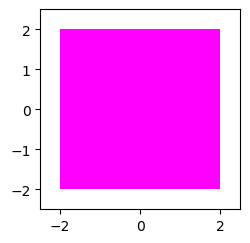

In [16]:
universe.plot(width=(5, 5), basis='xz', colors={cell: 'fuchsia'})

## Define Bounding Geometry

In [17]:
matBox = openmc.model.RectangularParallelepiped(-matCubeL/2, matCubeL/2, 
                                                -matCubeL/2, matCubeL/2, 
                                                -matCubeL/2, matCubeL/2,
                                                boundary_type='reflective')

In [18]:
type(matBox)

openmc.model.surface_composite.RectangularParallelepiped

In [19]:
material_region = -matBox

In [20]:
material_Geom = openmc.Cell(name='material_Geom')
#material_Geom.fill = materials #<<(SRB) This probably isn't correct.  Needs to be a material.
material_Geom.fill = mixMat
material_Geom.region = material_region

In [21]:
root_universe = openmc.Universe(cells=[material_Geom])

geometry = openmc.Geometry()
geometry.root_universe = root_universe
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="2" material="4" name="material_Geom" region="-8 7 -10 9 -12 11" universe="2" />
  <surface boundary="reflective" coeffs="-0.5" id="7" type="x-plane" />
  <surface boundary="reflective" coeffs="0.5" id="8" type="x-plane" />
  <surface boundary="reflective" coeffs="-0.5" id="9" type="y-plane" />
  <surface boundary="reflective" coeffs="0.5" id="10" type="y-plane" />
  <surface boundary="reflective" coeffs="-0.5" id="11" type="z-plane" />
  <surface boundary="reflective" coeffs="0.5" id="12" type="z-plane" />
</geometry>


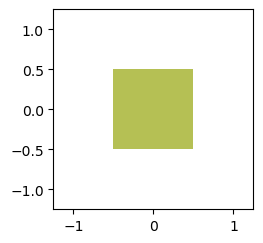

In [22]:
root_universe.plot(width=(2.5, 2.5), basis='xz', colors={cell: 'fuchsia'})

## Cross Sections

In [23]:
!cat $OPENMC_CROSS_SECTIONS | head -n 10
print('    ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="neutron/H1.h5" type="neutron" />
  <library materials="H2" path="neutron/H2.h5" type="neutron" />
  <library materials="H3" path="neutron/H3.h5" type="neutron" />
  <library materials="He3" path="neutron/He3.h5" type="neutron" />
  <library materials="He4" path="neutron/He4.h5" type="neutron" />
  <library materials="Li6" path="neutron/Li6.h5" type="neutron" />
  <library materials="Li7" path="neutron/Li7.h5" type="neutron" />
  <library materials="Be7" path="neutron/Be7.h5" type="neutron" />
    ...
  <library materials="Cf253" path="wmp/098253.h5" type="wmp" />
  <library materials="Cf254" path="wmp/098254.h5" type="wmp" />
  <library materials="Es251" path="wmp/099251.h5" type="wmp" />
  <library materials="Es252" path="wmp/099252.h5" type="wmp" />
  <library materials="Es253" path="wmp/099253.h5" type="wmp" />
  <library materials="Es254" path="wmp/099254.h5" type="wmp" />
  <library materials="

## Source

In [24]:
# create a point source
point = openmc.stats.Point((0,0,0))
source = openmc.Source(space=point)


In [25]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [26]:
settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="point">
      <parameters>0 0 0</parameters>
    </space>
  </source>
</settings>


## Tallies

In [27]:
cell_filter = openmc.CellFilter(material_Geom)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

In [28]:
tally.nuclides = ['U235']
tally.scores = ['total','fission','absorption','(n,gamma)']

In [29]:
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

<?xml version='1.0' encoding='utf-8'?>
<tallies>
  <filter id="1" type="cell">
    <bins>2</bins>
  </filter>
  <tally id="1">
    <filters>1</filters>
    <nuclides>U235</nuclides>
    <scores>total fission absorption (n,gamma)</scores>
  </tally>
</tallies>


In [30]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [31]:
!cat tallies.out

 ============================>     TALLY 1     <============================

 Cell 2
   U235
     Total Reaction Rate                  0.980985 +/- 0.00303117
     Fission Rate                         0.432666 +/- 0.00202472
     Absorption Rate                      0.61327 +/- 0.00264133
     (n,gamma)                            0.180604 +/- 0.000679527


## Plot Geometry

In [32]:
plot = openmc.Plot()
plot.filename = 'homogeneousMatMixPlot'
#plot.width = (pitch,pitch)
plot.width = (matCubeL,matCubeL)
plot.pixels = (200,200)
plot.color_by = 'material'
plot.colors = {fuel: 'yellow',hel_Cool: 'blue'}

In [33]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

<?xml version='1.0' encoding='utf-8'?>
<plots>
  <plot basis="xy" color_by="material" filename="homogeneousMatMixPlot" id="3" type="slice">
    <origin>0.0 0.0 0.0</origin>
    <width>1 1</width>
    <pixels>200 200</pixels>
    <color id="1" rgb="255 255 0" />
    <color id="3" rgb="0 0 255" />
  </plot>
</plots>


In [34]:
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

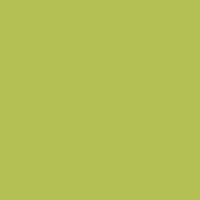

In [35]:
from IPython.display import Image
Image('homogeneousMatMixPlot.png')

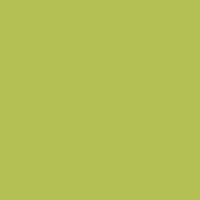

In [36]:
plot.to_ipython_image()

# 